In [277]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "serif"

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pylab as plb
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from pmdarima import auto_arima

In [278]:
base = pd.read_csv("../data/AirPassengers.csv")

base.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [279]:
base.shape

(144, 2)

In [280]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [281]:
base = pd.read_csv("../data/AirPassengers.csv", parse_dates = ['Month'], index_col = 'Month', date_format='%Y-%m')

base.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [282]:
print(base.dtypes)

#Passengers    int64
dtype: object


In [283]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [284]:
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [285]:
# Depreciated
# ts[1]

ts.iloc[1]

118

In [286]:
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [287]:
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [288]:
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [289]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [290]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [291]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

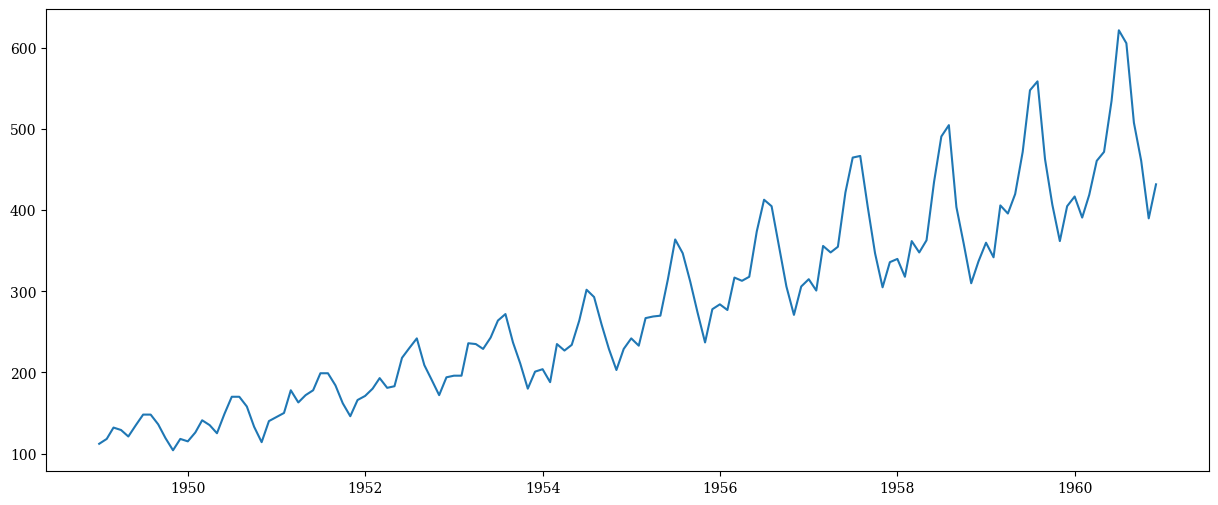

In [292]:
plt.plot(ts);

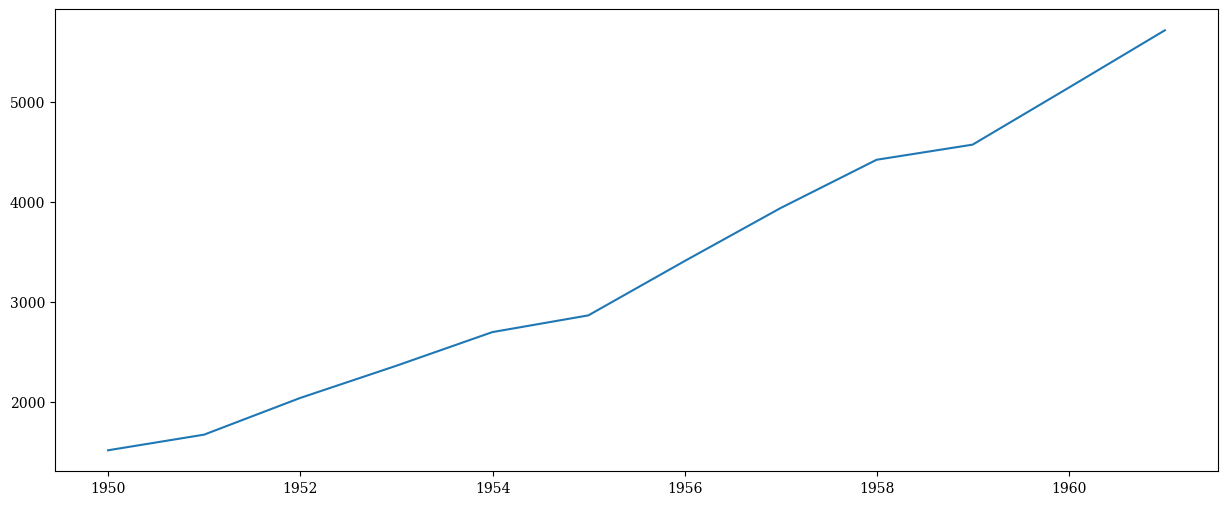

In [293]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano);

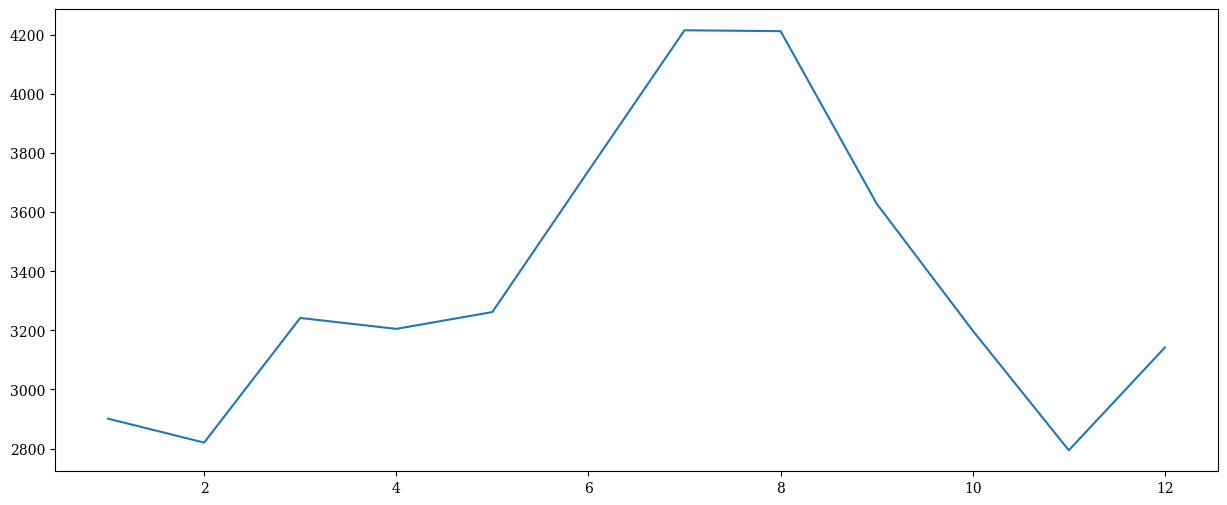

In [294]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes);

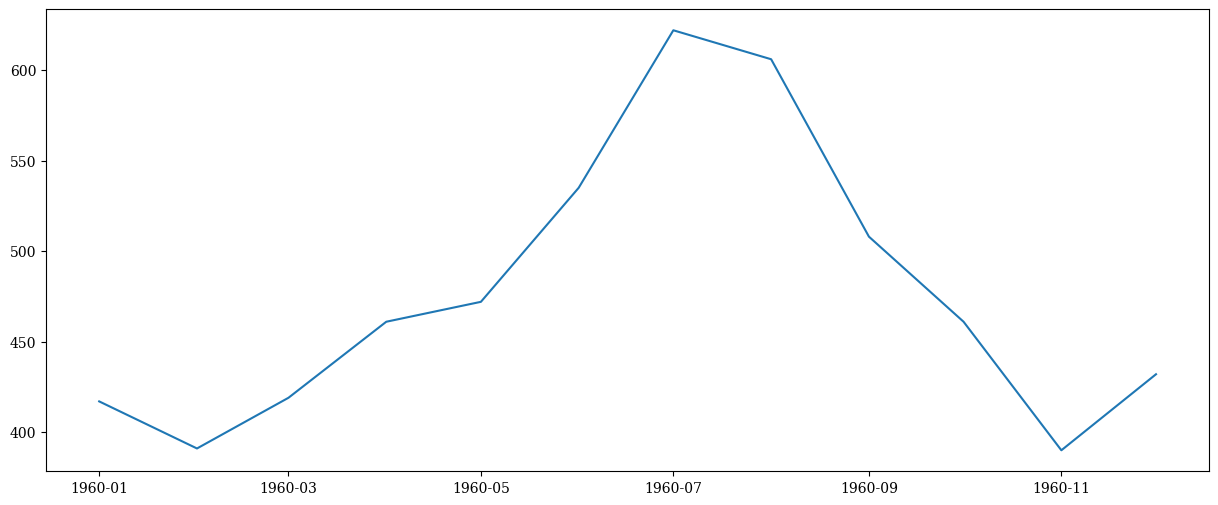

In [295]:
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas);

In [296]:
decomposition = seasonal_decompose(ts)

In [297]:
trend = decomposition.trend
trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [298]:
season = decomposition.seasonal
season

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [299]:
random = decomposition.resid
random

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

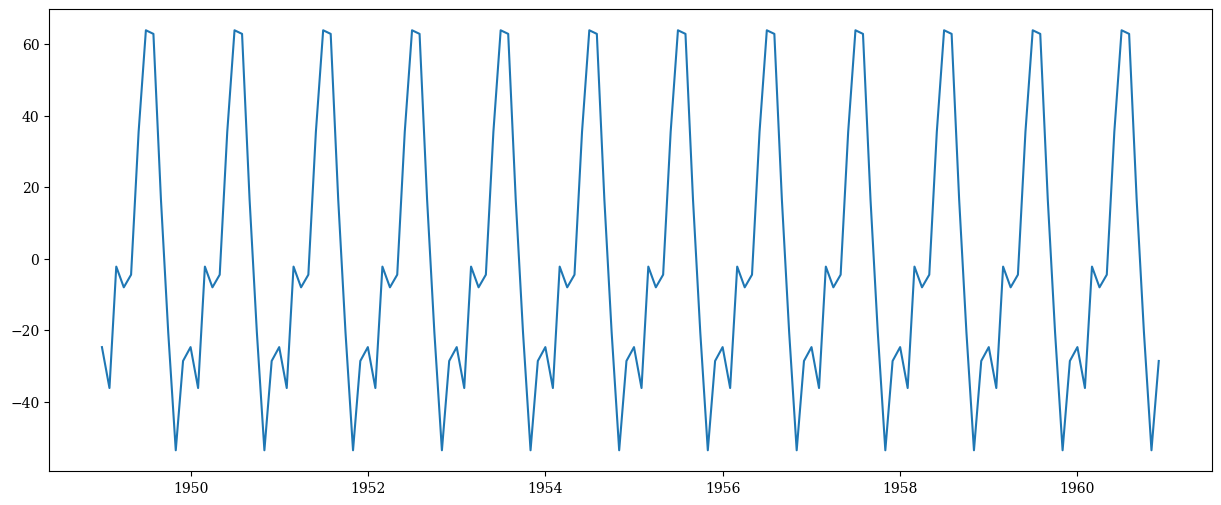

In [300]:
plt.plot(season);

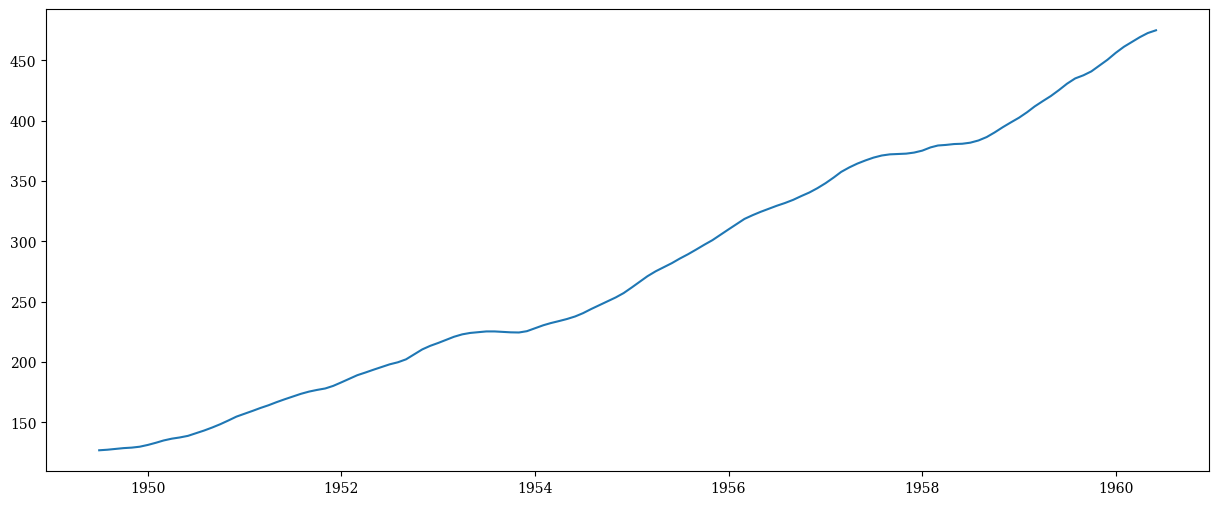

In [301]:
plt.plot(trend);

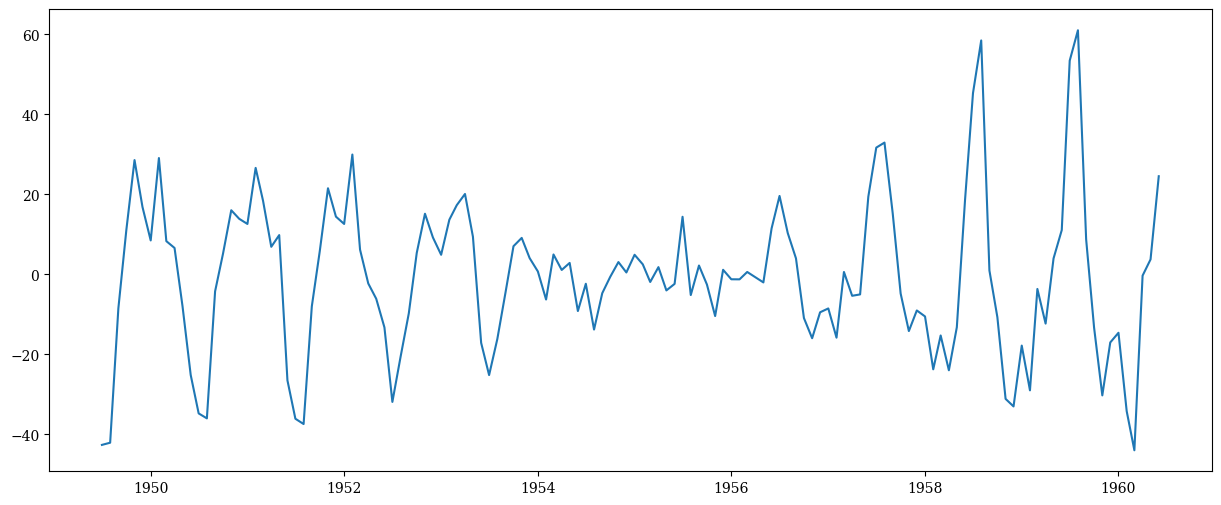

In [302]:
plt.plot(random);

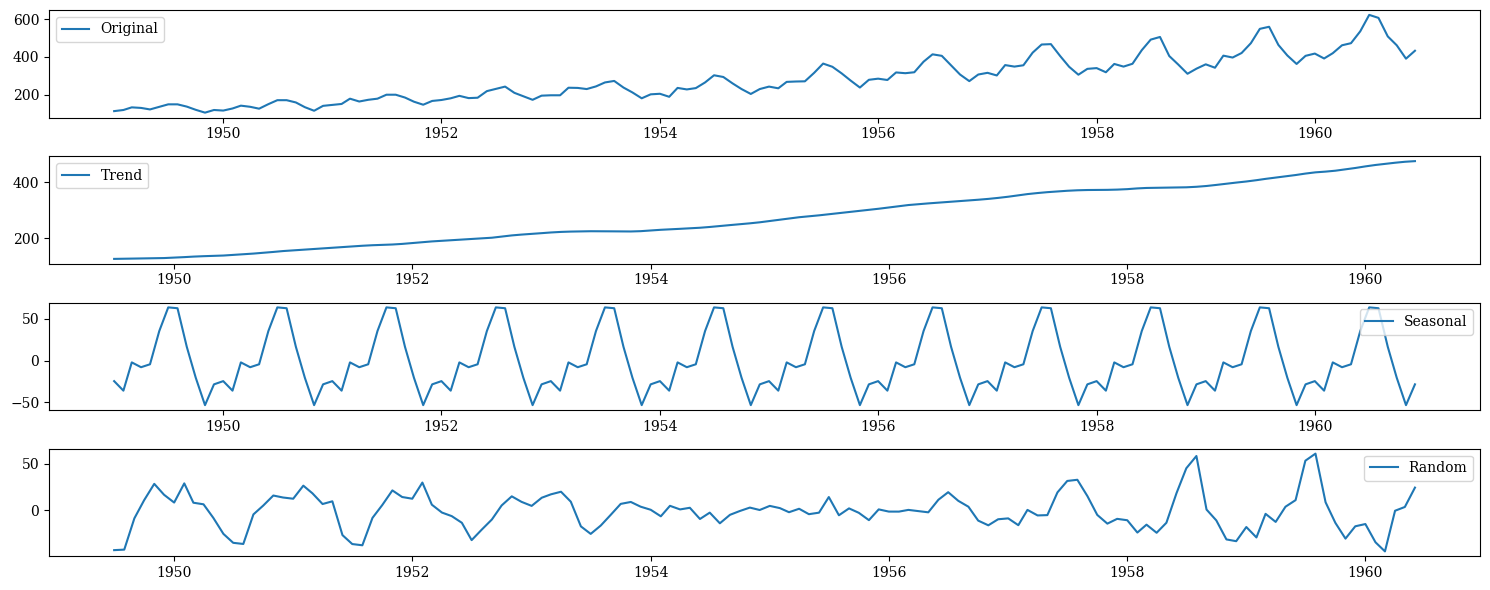

In [303]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(season, label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(random, label = 'Random')
plt.legend(loc = 'best')

plt.tight_layout()

In [304]:
stepwise_model = auto_arima(base, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.15 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.30 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.10 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.21 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=0.63 sec
 ARIM

In [305]:
print(stepwise_model.aic())

1012.9907965496147


In [306]:
train = base.loc['1949-01-01':'1959-12-01']
test = base.loc['1960-01-01':]

In [307]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [308]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [309]:
stepwise_model.fit(train) 

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [310]:
future_forecast = stepwise_model.predict(n_periods=12)

In [311]:
future_forecast

1960-01-01    420.238724
1960-02-01    398.455309
1960-03-01    461.909155
1960-04-01    450.689577
1960-05-01    474.008346
1960-06-01    537.919093
1960-07-01    612.241475
1960-08-01    623.598095
1960-09-01    520.171272
1960-10-01    462.321376
1960-11-01    412.933738
1960-12-01    453.756079
Freq: MS, dtype: float64

In [312]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['#Passengers'])

<Axes: xlabel='Month'>

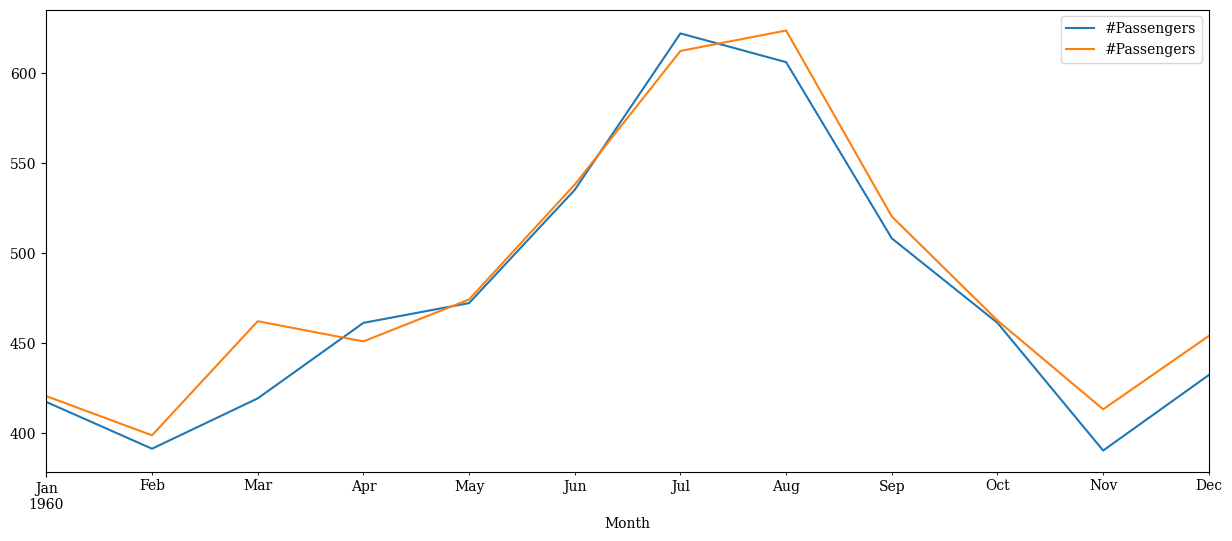

In [313]:
pd.concat([test, future_forecast], axis=1).plot()

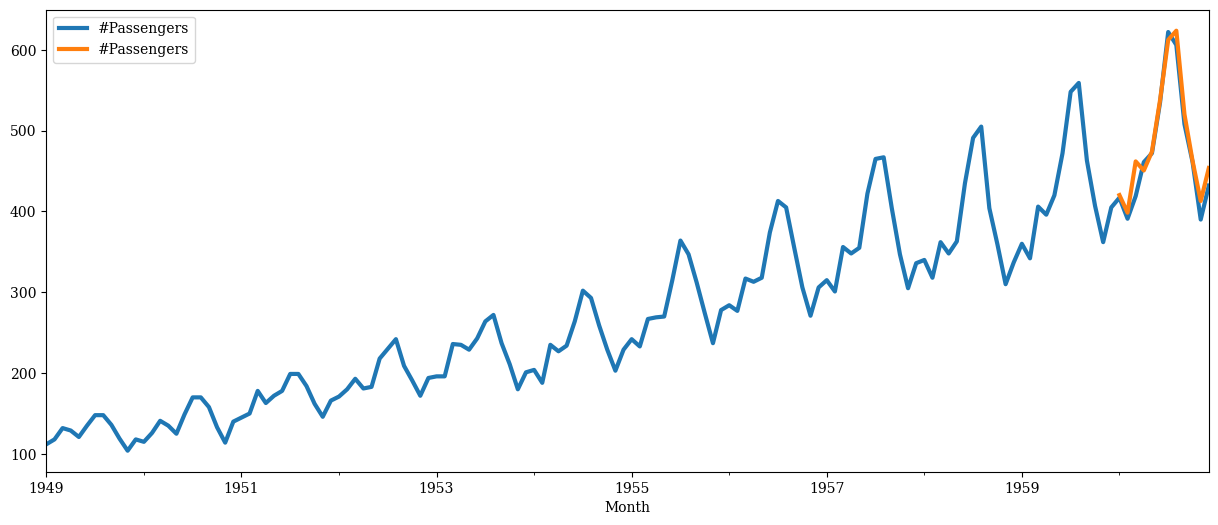

In [314]:
pd.concat([base, future_forecast], axis=1).plot(linewidth=3);